# Graphs

Graphing data...

In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from scipy.optimize import curve_fit

In [20]:
armadillos = np.loadtxt('data/armadillo.tsv', delimiter='\t')
crabs = np.loadtxt('data/crab.tsv', delimiter='\t')
crocs = np.loadtxt('data/croc.tsv', delimiter='\t')
goos = np.loadtxt('data/goo.tsv', delimiter='\t')
osnakes = np.loadtxt('data/osnake.tsv', delimiter='\t')
snakes = np.loadtxt('data/snake.tsv', delimiter='\t')

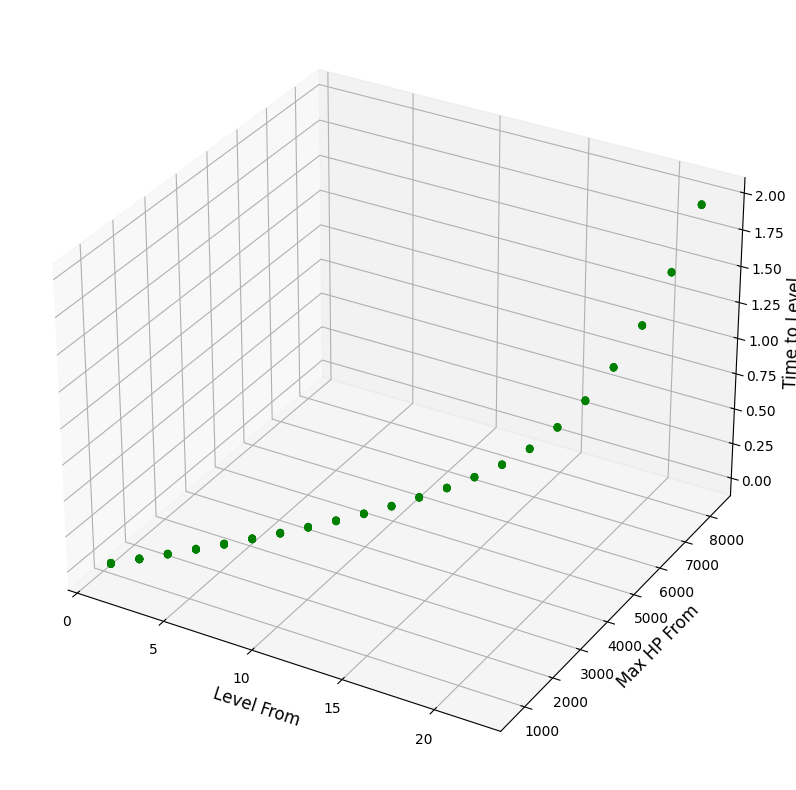

In [21]:
graph = plt.figure()
graph.set_figwidth(40)
graph.set_figheight(10)
ax = plt.axes(projection='3d')
ax.set_xlabel('Level From', fontsize=12)
ax.set_ylabel('Max HP From', fontsize=12)
ax.set_zlabel('Time to Level', fontsize=12)

# ax.scatter3D(armadillos[:, 1], armadillos[:, 3], armadillos[:, 0], color='brown')
# ax.scatter3D(crabs[:, 1], crabs[:, 3], crabs[:, 0], color='red')
# ax.scatter3D(crocs[:, 1], crocs[:, 3], crocs[:, 0], color='darkgreen')
# ax.scatter3D(goos[:, 1], goos[:, 3], goos[:, 0], color='limegreen')
# ax.scatter3D(osnakes[:, 1], osnakes[:, 3], osnakes[:, 0], color='orange')
ax.scatter3D(snakes[:, 1], snakes[:, 3], snakes[:, 0], color='green')

plt.show()

In [22]:
def f(X, a, b, c, d, e, f):
    level, hp = X
    return a + (b * level) + (c * (level ** 2)) + (d * hp) + (e * (hp ** 2)) + (f ** level)

# monsters = [armadillos, crabs, crocs, goos, osnakes, snakes]

level = np.concatenate([data[:, 1] for data in monsters])
max_hp = np.concatenate([data[:, 3] for data in monsters])
time_to_level = np.concatenate([data[:, 0] for data in monsters])

popt, pcov = curve_fit(f, (level, max_hp), time_to_level, bounds=(0, np.inf))

In [23]:
popt

array([1.30042879e-11, 8.84630427e-07, 2.03441824e+04, 3.08553390e-19,
       3.07113618e-02, 1.98917654e+00])

In [24]:
pcov

array([[ 1.16562705e+11, -2.21686275e+10,  8.90406005e+08,
        -1.43703430e+06,  4.84713577e+01, -4.34189957e+02],
       [-2.21686275e+10,  6.56844865e+09, -2.80703205e+08,
        -1.76444676e+06,  5.72270342e+01,  1.66981975e+02],
       [ 8.90406005e+08, -2.80703205e+08,  1.31132844e+07,
         4.41274171e+04, -1.65241194e+00, -9.21052439e+00],
       [-1.43703430e+06, -1.76444676e+06,  4.41274171e+04,
         4.87682671e+03, -1.59947762e-01, -2.29219290e-02],
       [ 4.84713577e+01,  5.72270342e+01, -1.65241194e+00,
        -1.59947762e-01,  5.90162096e-06,  1.03396821e-06],
       [-4.34189957e+02,  1.66981975e+02, -9.21052439e+00,
        -2.29219290e-02,  1.03396821e-06,  1.96087623e-05]])

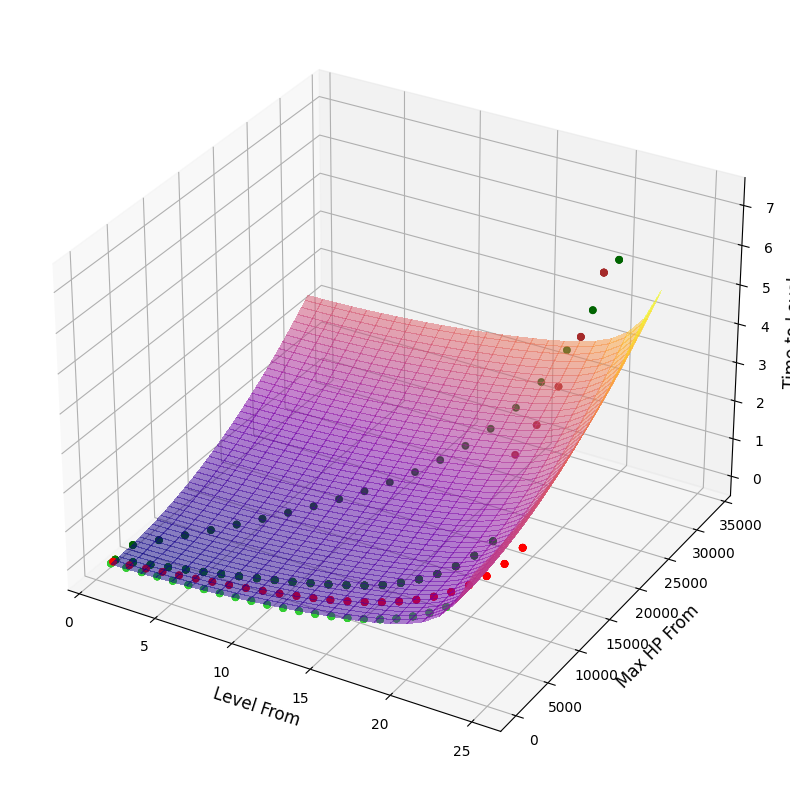

In [25]:
graph = plt.figure()
graph.set_figwidth(40)
graph.set_figheight(10)
ax = plt.axes(projection='3d')
ax.set_xlabel('Level From', fontsize=12)
ax.set_ylabel('Max HP From', fontsize=12)
ax.set_zlabel('Time to Level', fontsize=12)

ax.scatter3D(armadillos[:, 1], armadillos[:, 3], armadillos[:, 0], color='brown')
ax.scatter3D(crabs[:, 1], crabs[:, 3], crabs[:, 0], color='red')
ax.scatter3D(crocs[:, 1], crocs[:, 3], crocs[:, 0], color='darkgreen')
ax.scatter3D(goos[:, 1], goos[:, 3], goos[:, 0], color='limegreen')
ax.scatter3D(osnakes[:, 1], osnakes[:, 3], osnakes[:, 0], color='orange')
ax.scatter3D(snakes[:, 1], snakes[:, 3], snakes[:, 0], color='green')

LEVELS = np.arange(1, 25, 1)
MAX_HP = np.arange(100, 30000, 100)
X, Y = np.meshgrid(LEVELS, MAX_HP)
Z = f((X, Y), popt[0], popt[1], popt[2], popt[3], popt[4], popt[5])
surf = ax.plot_surface(X, Y, Z, cmap=cm.plasma, alpha=0.5, linewidth=0, antialiased=False)

plt.show()